# Muti-type Aircraft of Remote Sensing Images, MtARSI

## Dataset providers
- Wu, Zhize. (2019). Muti-type Aircraft of Remote Sensing Images: MTARSI [Data set]. Zenodo.
- Richard Rudd-Orthner, & Lyudmila Mihaylova. (2021). Multi-type Aircraft of Remote Sensing Images: MTARSI 2 [Data set]. Zenodo.


## Code Author
- @author: friedricelab


## Tasks (Exploratory Data Analysis, EDA)
- Count each airplane images
- Create a dataframe
- Visualize dataframe with directories and image countings
- Image file labeling (ONE-HOT or Integers) 
- Check images
- Split into K-folds

## import libraries

In [ ]:
import os
import fnmatch
import matplotlib.pylab as plt
import pandas as pd

# import seaborn as sns

In [ ]:
# plt.style.use('Solarize_Light2')

# Mount Google Drive and extract zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
my_path = 'MyDrive/CNN/MTARSI/'
fullpath = '/content/drive/' + my_path

# use $ symbol to use variable as path
%cd $fullpath 

/content/drive/MyDrive/CNN/MTARSI


## Extract a zipfile

In [ ]:
##################################
# List zipfiles to extract in the list below 
zipfiles = ['MTARSI_2.zip']
##################################

# Check if listed zipfiles exists
for file in zipfiles:
    assert os.path.isfile(file) == True

In [ ]:
# Extract zipfile(s)

default_foldername = 'airplane-dataset-trans'

for zipfile in zipfiles:
    if not os.path.isdir(default_foldername):
        !unzip $zipfile
        print("Zipfile extraction done.")
        
    else:
        print("Directory - {} -  already exists. No extractions to be done.".format(default_foldername))

Directory - airplane-dataset-trans -  already exists. No extractions to be done.


# EDA

## Count each airplane images
- Number of images per airplane type
- Visualize counts

In [ ]:
class AirplanesCounter:
    
    # Reading folders with airplane titles
    def __init__(self, path, count_imgs = True, return_maindir = True):
        self.count_imgs_arg = count_imgs
        
        # This LIST will contain airplane folders title ex). ../A-10/,  ../F-117/...
        self.planes_dir = []
        
        # This DICTIONARY will contain main directory address 
        # and the number of images each directory has.
        self.planes_img_counts = {}
        
        # Scanning airplane folders.. 
        self.planes = os.scandir(os.path.dirname(path))
        
        # Append all airplane folder addresses in self.planes_dir list.
        for plane in self.planes:
                self.planes_dir.append(plane.path)
        
        self.planes_dir.sort()
    
    # Counting images in an airplne folder
    def plane_img_counter(self):
        if self.count_imgs_arg:
            for i in range(len(self.planes_dir)):
                objects = os.scandir(os.path.dirname(self.planes_dir[i] + '/'))
                
                cnt = 0
                for obj in objects:
                    # Getting filename extensions
                    # use either os.path.splitext() or fnmatch.fnmatch().
                    # glob.glob() is also another useful function.
                    # Refer to appendix codes.
                    
                    # os.path.splitext() example ----
                    # filename -> path / untitled1.jpg
                    # ex). filename = os.path.splitext(obj.path)
                    # usually filename[1] indicates the file extension (in this case, '.jpg'),
                    # and filename[0] is the name (untitled1).
                    
                    # fnmatch.fnmatch() example ---- 
                    # ex). fnmatch.fnmatch(obj, '*.extension)
                    
                    if not obj.is_dir() and fnmatch.fnmatch(obj.path, '*.jpg') or fnmatch.fnmatch(obj.path, '*.png'):
                        cnt = cnt + 1
                        
                self.planes_img_counts[self.planes_dir[i]] = cnt
        
        return self.planes_img_counts
    
    # Returns self.planes_dir list
    def getMaindirectories(self):
        return self.planes_dir

In [ ]:
path = 'airplane-dataset-trans/'

airplane_counts = AirplanesCounter(path = path)

# Counting images
counts = airplane_counts.plane_img_counter()

# images directories
mainpath = airplane_counts.getMaindirectories()

## Create a dataframe with image counts
- Create a dataframe with main directory and airplane counts
- Optional: rule out classes with images under 100 or 150.

In [ ]:
counts_data = {'mainpath' : mainpath, 'counts': counts.values()}
df = pd.DataFrame(counts_data)

In [ ]:
# Optional
# df.drop(df[df.score < 50].index, inplace=True)

In [ ]:
rows_to_show = len(mainpath)
print("Displaying {} out of {} folders." .format(rows_to_show, len(df)))

df[0:rows_to_show]

Displaying 42 out of 42 folders.


,mainpath,counts
0,airplane-dataset-trans/A-10_Thunderbolt,345
1,airplane-dataset-trans/ATR-72_Airliner,241
2,airplane-dataset-trans/ATR_72_ASW,103
3,airplane-dataset-trans/Airliner,759
4,airplane-dataset-trans/B-1_Lancer,407
5,airplane-dataset-trans/B-29_Superfortress,321
6,airplane-dataset-trans/B-2_Spirit,619
7,airplane-dataset-trans/B-52_Stratofortress,548
8,airplane-dataset-trans/B-57_Canberra,248
9,airplane-dataset-trans/BusinessJet,312


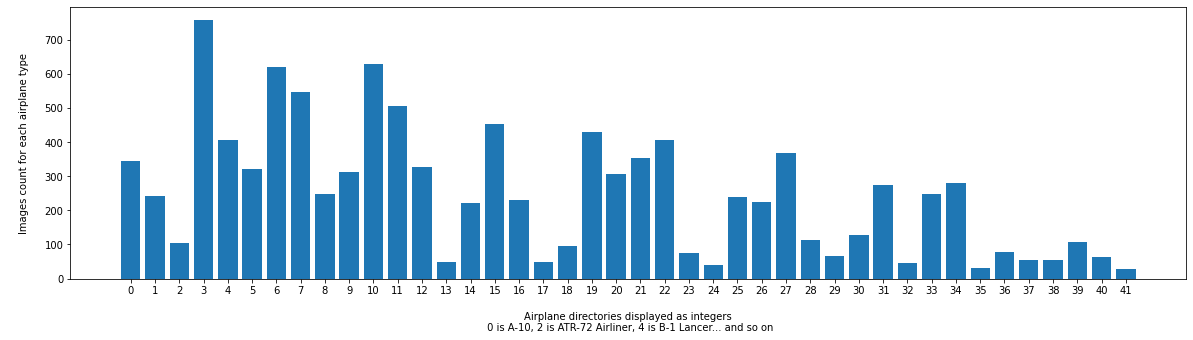

In [ ]:
plt.figure(figsize = (20, 5))

airplane_directories = df['mainpath']
airplane_counts = df['counts']

plt.bar(airplane_directories.index.values, airplane_counts)
plt.xticks(airplane_directories.index.values)

plt.ylabel("\nImages count for each airplane type\n")
plt.xlabel("\nAirplane directories displayed as integers\n 0 is A-10, 2 is ATR-72 Airliner, 4 is B-1 Lancer... and so on")
plt.show()

In [ ]:
def getClassNames(mainpath, getFullPath = False):
    
    # =========================# 
    def findAirplanetitle(directory): # Nested function to find the last backslash of a directory (Airplane type name).
        
        slashes = [] # Will contain indices of backslahses in a directory address
    
        for i in range(len(directory)): # Find every backslash indices in a directory address
            if directory[i] == '/':
                slashes.append(i)
        
        return max(slashes) # Returns largest index integer 
    # =========================# 
    
    planeList = [] # Will contain aircraft names
    fullpath = [] # Will contain full directory path
    
    folders = os.scandir(os.path.dirname(mainpath))
    
    for folder in folders:        
        backslash = findAirplanetitle(folder.path) # Find largest backslash index in a directory address
        title = folder.path[backslash + 1:]        
        planeList.append(title)
        
        if getFullPath:
            fullpath.append(folder.path)
    
    # Alphabetical order 
    planeList.sort()
    fullpath.sort()
    
    return planeList, fullpath
        
path = 'airplane-dataset-trans/'
class_names, _ = getClassNames(path)


In [ ]:
class_names[0:10]

['A-10_Thunderbolt',
 'ATR-72_Airliner',
 'ATR_72_ASW',
 'Airliner',
 'B-1_Lancer',
 'B-29_Superfortress',
 'B-2_Spirit',
 'B-52_Stratofortress',
 'B-57_Canberra',
 'BusinessJet']

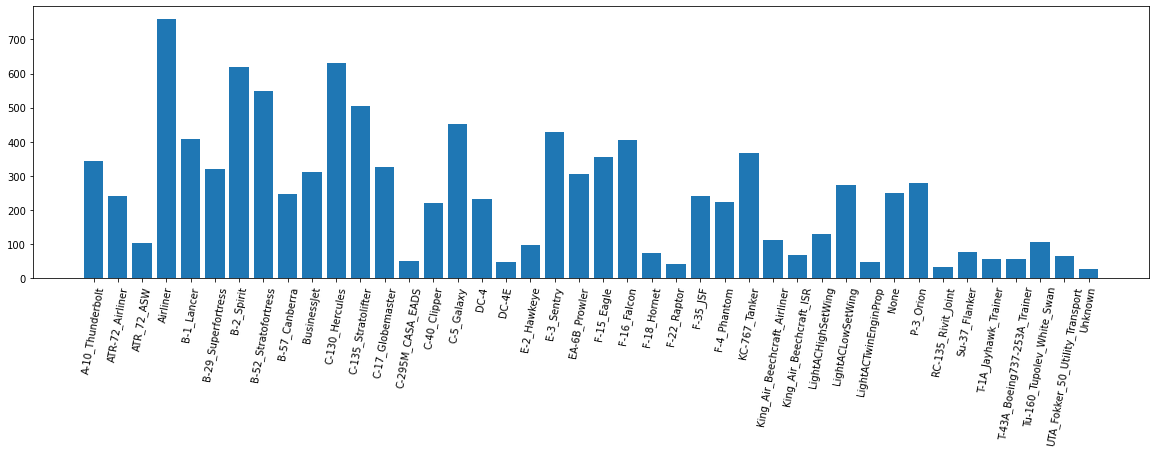

In [ ]:
counts_data = {'titles' : class_names, 'counts': counts.values()}
dfA = pd.DataFrame(counts_data)

plt.figure(figsize = (20, 5))
plt.bar(dfA['titles'], dfA['counts'])

plt.xticks(rotation=80)
plt.show()

## Listing and labelling images in each plane directory
- one-hot encoding argument to be implemented later

In [ ]:
class AirplanesLabeling:
    
    def __init__(self, paths, onehot = False):
        # paths = if mainpath,
        # mainpath for A-10 -> ..\MTARSI\airplane-dataset-trans\A-10_Thunderbolt
        #          for Airliner -> ..\MTARSI\airplane-dataset-trans\Airliner	
        
        # self.onehot = onehot
        self.path = paths
        self.fileaddr_labels = {}
    
    def listingImgs(self):        
        cnt = 0
        
        for i in range(len(self.path)):
            objects = os.scandir(os.path.dirname(self.path[i] + '/'))
            
            for obj in objects:
                if not obj.is_dir() and fnmatch.fnmatch(obj.path, '*.jpg') or fnmatch.fnmatch(obj.path, '*.png'):
                    self.fileaddr_labels[obj.path] = cnt
            
            cnt = cnt + 1
        
        return self.fileaddr_labels

In [ ]:
labeling = AirplanesLabeling(paths = mainpath)
files_list = labeling.listingImgs()

In [ ]:
label_data = {'directories': files_list.keys(), 
              'labels': files_list.values()}

df_labels = pd.DataFrame(data = label_data)
df_labels

,directories,labels
0,airplane-dataset-trans/A-10_Thunderbolt/15-70.jpg,0
1,airplane-dataset-trans/A-10_Thunderbolt/15-3.jpg,0
2,airplane-dataset-trans/A-10_Thunderbolt/15-36.jpg,0
3,airplane-dataset-trans/A-10_Thunderbolt/15-79.jpg,0
4,airplane-dataset-trans/A-10_Thunderbolt/15-50.jpg,0
...,...,...
10478,airplane-dataset-trans/Unknown/11-253.jpg,41
10479,airplane-dataset-trans/Unknown/13-27 - Copy.jpg,41
10480,airplane-dataset-trans/Unknown/13-27.jpg,41
10481,airplane-dataset-trans/Unknown/13-27 - Copy - ...,41


## Check images

In [ ]:
import cv2

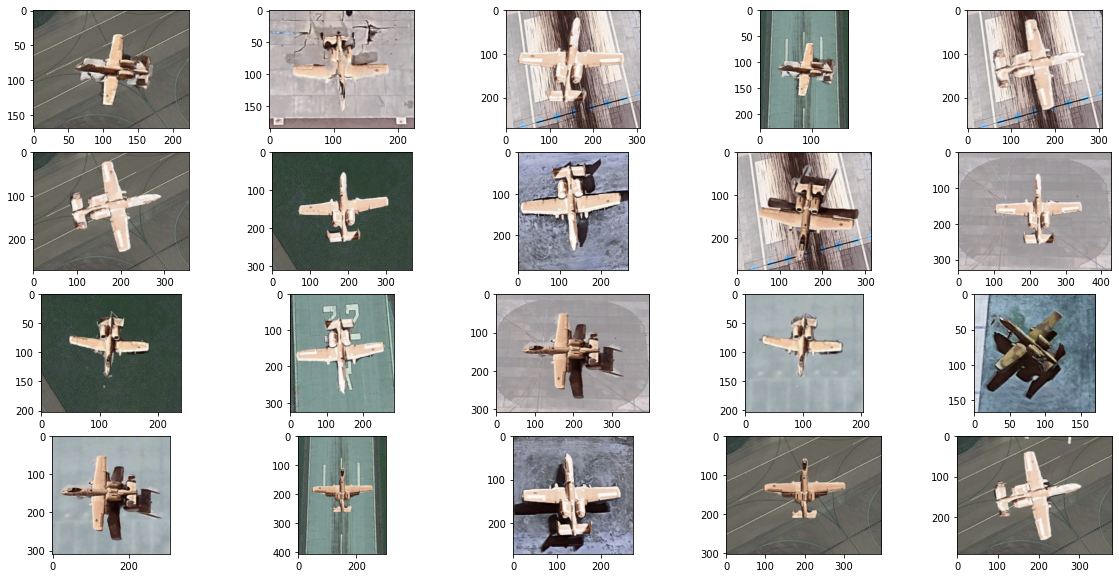

In [ ]:
airplane_path = files_list.keys()
airplane_path = list(airplane_path)

plt.figure(figsize = (20, 10))

for i in range(20):
    img = cv2.imread(airplane_path[i])
    plt.subplot(4, 5, i + 1)
    plt.imshow(img) 

## Split training and validation index by StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
sKF = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 42)

df_labels['fold_idx'] = -1

# 1 means to name indices from 1, not from 0.
for idx, (train, validation) in enumerate(sKF.split(df_labels, df_labels['labels']), 1):
    print("Train_set:", train, len(train), "Validation_set:", validation, len(validation))
    df_labels.loc[validation, 'fold_idx'] = idx

Train_set: [    0     2     3 ... 10473 10478 10480] 5241 Validation_set: [    1     8    11 ... 10479 10481 10482] 5242
Train_set: [    1     8    11 ... 10479 10481 10482] 5242 Validation_set: [    0     2     3 ... 10473 10478 10480] 5241


In [ ]:
df_labels[0:10]

,directories,labels,fold_idx
0,airplane-dataset-trans/A-10_Thunderbolt/15-70.jpg,0,2
1,airplane-dataset-trans/A-10_Thunderbolt/15-3.jpg,0,1
2,airplane-dataset-trans/A-10_Thunderbolt/15-36.jpg,0,2
3,airplane-dataset-trans/A-10_Thunderbolt/15-79.jpg,0,2
4,airplane-dataset-trans/A-10_Thunderbolt/15-50.jpg,0,2
5,airplane-dataset-trans/A-10_Thunderbolt/15-54.jpg,0,2
6,airplane-dataset-trans/A-10_Thunderbolt/15-31.jpg,0,2
7,airplane-dataset-trans/A-10_Thunderbolt/15-6.jpg,0,2
8,airplane-dataset-trans/A-10_Thunderbolt/15-26.jpg,0,1
9,airplane-dataset-trans/A-10_Thunderbolt/15-49.jpg,0,2


In [ ]:
df_labels.to_csv('dirs_kfolds.csv', index = False)

# Appendix
## Appendix A. Using glob to count files (example)

In [ ]:
from glob import glob

path = 'airplane-dataset-trans/A-10_Thunderbolt'
print(path)

objects_jpg = glob(path + '/' + '*.jpg')
objects_png = glob(path + '/' + '*.png')

print(len(objects_jpg) + len(objects_png))

airplane-dataset-trans/A-10_Thunderbolt
345


## Appendix B. Using fnmatch (example)
- Replace 'EXTENSION' with any file extension of file you are willing to pick

In [ ]:
import fnmatch

path = mainpath + 'A-10_Thunderbolt'
objects = os.scandir(os.path.dirname(path + '/'))

# for obj in objects:
#     if fnmatch.fnmatch(obj, '*.EXTENSION'):
#         print(obj)

TypeError: ignored

## Appendix C. Removing folders with files in it (linux command)

In [ ]:
# Replace temp string 'FOLDER_XYZ_KYZ_PYZ_123401234' with your target folder name
DO_NOT_RUN_THIS_CELL

%cd airplane-dataset-trans/ 

# Command to remove a folder with files in it
!rm -r '.ipynb_checkpoints'

# Command to remove an empty directory
!rmdir 'FOLDER_XYZ_KYZ_PYZ_123401234'

/content/drive/MyDrive/CNN/MTARSI/airplane-dataset-trans
rmdir: failed to remove 'FOLDER_XYZ_KYZ_PYZ_123401234': No such file or directory


# Appendix B. Using df.loc()

In [ ]:
import numpy as np

a = np.array([1,2,3,4])

dta = {'A':a}
dfa = pd.DataFrame(dta)

dfa.loc[3, 'A'] = 'C'
dfa